# Ejercicio Predicción Tipo Sistema Operativo - Regresión Logística

## Importamos librerías

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Cargamos los datos de entrada del archivo csv

In [4]:
dataframe = pd.read_csv("./datasets/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


El método dataframe.describe() nos dará algo de información estadística básica de nuestro set de datos. La Media, el desvío estándar, valores mínimo y máximo de cada característica.

In [5]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


En este paso comprobamos cuantas observaciones tenemos de cada tipo usando la función groupby. Se observa que tenemos 86 usuarios “Clase 0”, es decir Windows, 40 usuarios Mac, "Clase 1" y 44 de Linux, "Clase 2".

In [6]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

Graficamos los histogramas de las cuatro "features"(variables independientes o características) de entrada con los nombres “duración”, “páginas”,”acciones” y “valor”. Observamos entre qué valores se mueven sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros.

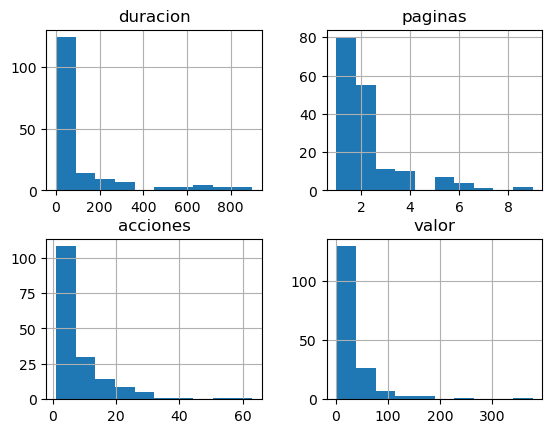

In [7]:
dataframe.drop(['clase'],axis=1).hist()
plt.show()

## Creamos el modelo

Cargamos las variables de las 4 columnas de entrada en **X** (conjunto de variables independientes y, por tanto, variables de entrada) excluyendo la columna “clase” (variable de salida) usando el método drop().  
Para comprobar las predicciones, agregamos la columna “clase” en la variable **y** (variable de salida).   
Con la función **X.shape()** comprobamos la dimensión de nuestra matriz con datos de entrada (170 registros/filas por 4 columnas).



In [8]:
X = np.array(dataframe.drop(['clase'],axis=1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Realizamos la partición en los conjuntos de entrenamiento y test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pasamos a crear y entrenar nuestro modelo de Regresión Logística

In [10]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Lanzamos las predicciones y tomamos como muestra las 5 primeras

In [11]:
y_pred = model.predict(X_test)
print(y_pred[0:5])

[0 1 2 1 0]


## Reporte de resultados

Comprobamos, usando la función **score()**, la precisión media de las predicciones del modelo

In [12]:
model.score(X_test,y_test)

0.7058823529411765

Comprobamos la EXACTITUD o ACCURACY

In [13]:
print(accuracy_score(y_test, y_pred))

0.7058823529411765


Comprobamos la SENSIBILIDAD del modelo

In [14]:
print(recall_score(y_test, y_pred, average='weighted'))

0.7058823529411765


Revisamos el valor de la PUNTUACIÓN F1

In [ ]:
print(f1_score(y_test, y_pred, average='weighted'))

Revisamos la PRECISIÓN

In [16]:
print(precision_score(y_test, y_pred, average='weighted'))

0.7092436974789916


Por último, revisamos y mostramos la MATRIZ DE CONFUSIÓN

In [17]:
print(confusion_matrix(y_test, y_pred))

[[13  2  1]
 [ 7  5  0]
 [ 0  0  6]]


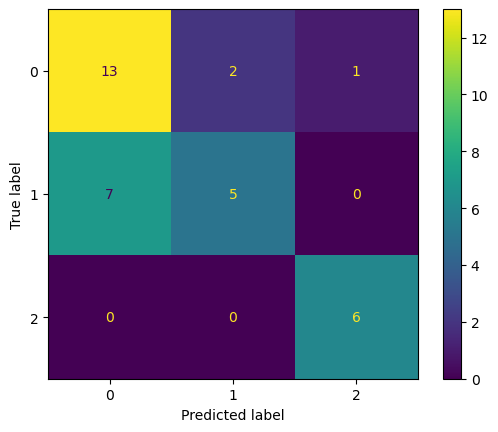

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.71      0.42      0.53        12
           2       0.86      1.00      0.92         6

    accuracy                           0.71        34
   macro avg       0.74      0.74      0.72        34
weighted avg       0.71      0.71      0.69        34


# Clasificación de nuevos registros

Como último paso, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

Tiempo Duración: 10
Paginas visitadas: 3
Acciones al navegar: 5
Valoración: 9  

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [20]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
prediccion = model.predict(X_new)
print(prediccion)

[2]


ERROR CUADRÁTICO MEDIO

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
print('MSE = ', MSE)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE = ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 = ', R2)

MSE =  0.38235294117647056
RMSE =  0.6183469424008423
R2 =  0.3179012345679012
